In [139]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [140]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [141]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [142]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [143]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine,reflect=True)

In [144]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [145]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [146]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [147]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).\
order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year=dt.date(2017,8,23)-dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [148]:
# Perform a query to retrieve the data and precipitation scores
pre_scores=session.query(measurement.date,measurement.prcp).\
filter(measurement.date > one_year).\
order_by(measurement.date).all()

In [149]:
pre_scores

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(pre_scores)
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [13]:
# Sort the dataframe by date
precipitation_df.set_index('date')
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


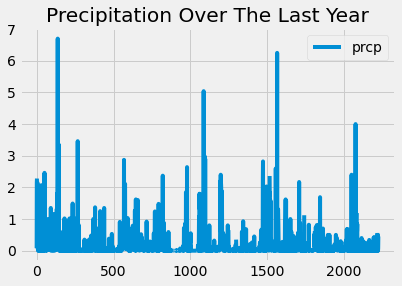

In [150]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df .plot(title="Precipitation Over The Last Year")
plt.savefig("Images/Precipitation.png")
plt.show()

In [151]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [152]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(measurement).\
group_by(measurement.station).count()
print(f'stations: {stations}')

stations: 9


In [153]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
actv_stations = session.query(measurement.station, 
func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
actv_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [154]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_actv=actv_stations[0][0]
most_actv

'USC00519281'

In [155]:
temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs),
func.avg(measurement.tobs)).filter(measurement.station == most_actv).all()

In [156]:
print(f'low: {temps[0][0]}')


low: 54.0


In [157]:
print(f'high: {temps[0][1]}')

high: 85.0


In [158]:
print(f'average: {temps[0][2]}')

average: 71.66378066378067


In [159]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_actv

'USC00519281'

In [160]:
temperatures = session.query( measurement.tobs).filter(measurement.date >= one_year).\
filter(measurement.station == most_actv).all()


In [161]:
temperatures = pd.DataFrame(temperatures, columns=['temperature'])
temperatures_df=temperatures

In [162]:
temperatures_df.head()

,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


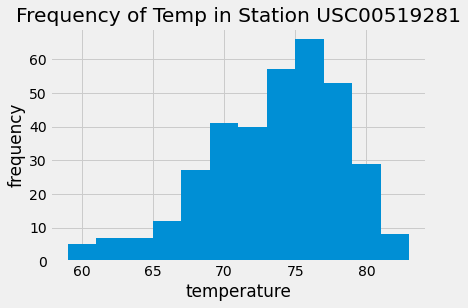

In [165]:
plt.hist(temperatures_df['temperature'], bins =12)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.title("Frequency of Temp in Station USC00519281")
plt.savefig("Images/Temperature Frequency.png")

# Close session

In [164]:
# Close Session
session.close()